In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy

%matplotlib inline

In [2]:
thre = 0.08

In [3]:
#read in as pandas (I quite like Pandas, working amazingly)
xl = pd.ExcelFile("C:/computer_harddrive/2017_oceanus/hplc/Cruise_chlorophyll.xlsx")
df = xl.parse("sub table for Cruise")
df['std']=df['chl_std']/df['chl_total']
sub = df[df['std']<thre]

oceanus_chl=sub['chl_total']
oceanus_micro=sub['micro%']
oceanus_nano=sub['nano%']
oceanus_pico=sub['pico%']
oceanus_std=sub['std']

In [4]:
#read in as pandas (I quite like Pandas, working amazingly)
xl = pd.ExcelFile("C:/computer_harddrive/2017_mayjune/Chl_fraction_2017MayJune.xlsx")
df = xl.parse("Lap")
df['std']=df['chl-std']/df['total-chl']
sub = df[df['std']<thre]

lap56_chl=sub['total-chl']
lap56_micro=sub['final_micro']
lap56_nano=sub['final_nano']
lap56_pico=sub['final_pico']
lap56_std=sub['std']

In [5]:
#read in as pandas (I quite like Pandas, working amazingly)
xl = pd.ExcelFile("C:/computer_harddrive/2017_mayjune/Chl_fraction_2017MayJune.xlsx")
df = xl.parse("Lip")
df['std']=df['std-total']/df['chl-total']
sub = df[df['std']<thre]

lip56_chl=sub['chl-total']
lip56_micro=sub['final-micro%']
lip56_nano=sub['final-nano%']
lip56_pico=sub['final-pico%']
lip56_std=sub['std']

In [6]:
#read in as pandas (I quite like Pandas, working amazingly)
xl = pd.ExcelFile("C:/computer_harddrive/2017_aug/Chl_fraction_2017Aug.xlsx")
df = xl.parse("Lap")
df['std']=df['std-total']/df['chl-total']
sub = df[df['std']<thre]

lap9_chl=sub['chl-total']
lap9_micro=sub['final-micro%']
lap9_nano=sub['final-nano%']
lap9_pico=sub['final-pico%']
lap9_std=sub['std']

In [7]:
#read in as pandas (I quite like Pandas, working amazingly)
xl = pd.ExcelFile("C:/computer_harddrive/2017_aug/Chl_fraction_2017Aug.xlsx")
df = xl.parse("Lip")
df['std']=df['std-total']/df['chl-total']
sub = df[df['std']<thre]

lip8_chl=sub['chl-total']
lip8_micro=sub['final-micro%']
lip8_nano=sub['final-nano%']
lip8_pico=sub['final-pico%']
lip8_std=sub['std']

In [8]:
#build the chl-a fraction model
# Hirata's model
y = np.arange(0.01, 100, 0.1)
x = np.log10(y)
micro = 1./ (0.9117 + np.exp (-2.7330* x + 0.4003)) #Micro
pico = -1./ (0.1529 + np.exp (1.0306* x - 1.5576)) - 1.8597*x +2.9954
nano = 1 - micro - pico

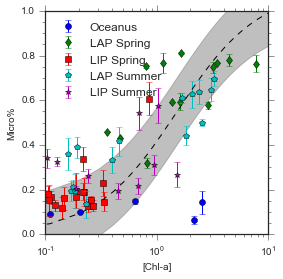

In [9]:
#plot
sns.set_style("ticks")
fig = plt.figure(figsize=(4, 4))

plt.fill_between(y, micro-0.15, micro+0.15, color='grey', alpha=0.5)
plt.plot(y, micro, "r--",c='black')#, label='chl-based Micro%'
plt.errorbar(oceanus_chl.values, oceanus_micro.values/100, yerr=oceanus_std.values,label='Oceanus',fmt="o")
plt.errorbar(lap56_chl.values, lap56_micro.values/100, yerr=lap56_std.values,label='LAP Spring',fmt="d")
plt.errorbar(lip56_chl.values, lip56_micro.values/100, yerr=lip56_std.values,label='LIP Spring',fmt="s")
plt.errorbar(lap9_chl.values, lap9_micro.values, yerr=lap9_std.values,label='LAP Summer',fmt="p")
plt.errorbar(lip8_chl.values, lip8_micro.values/100, yerr=lip8_std.values,label='LIP Summer',fmt="*")

plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
plt.xlabel('[Chl-a]')
plt.ylabel('Micro%')

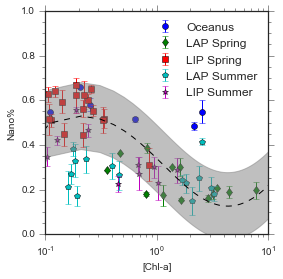

In [10]:
#plot nano
sns.set_style("ticks")
fig = plt.figure(figsize=(4, 4))

plt.fill_between(y, nano-0.15, nano+0.15, color='grey', alpha=0.5)
plt.plot(y, nano, "r--",c='black')#, label='chl-based Micro%'
plt.errorbar(oceanus_chl.values, oceanus_nano.values/100, yerr=oceanus_std.values,label='Oceanus',fmt="o",zorder=0)
plt.errorbar(lap56_chl.values, lap56_nano.values/100, yerr=lap56_std.values,label='LAP Spring',fmt="d",zorder=0)
plt.errorbar(lip56_chl.values, lip56_nano.values/100, yerr=lip56_std.values,label='LIP Spring',fmt="s",zorder=0)
plt.errorbar(lap9_chl.values, lap9_nano.values, yerr=lap9_std.values,label='LAP Summer',fmt="p",zorder=0)
plt.errorbar(lip8_chl.values, lip8_nano.values/100, yerr=lip8_std.values,label='LIP Summer',fmt="*",zorder=0)

plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper right')#[sc, pt]
plt.minorticks_on()
plt.xlabel('[Chl-a]')
plt.ylabel('Nano%')

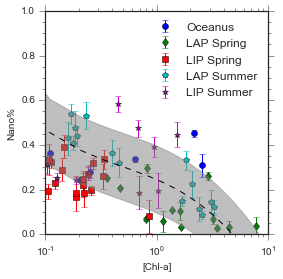

In [11]:
#plot nano
sns.set_style("ticks")
fig = plt.figure(figsize=(4, 4))

plt.fill_between(y, pico-0.15, pico+0.15, color='grey', alpha=0.5)
plt.plot(y, pico, "r--",c='black')#, label='chl-based Micro%'
plt.errorbar(oceanus_chl.values, oceanus_pico.values/100, yerr=oceanus_std.values,label='Oceanus',fmt="o",zorder=0)
plt.errorbar(lap56_chl.values, lap56_pico.values/100, yerr=lap56_std.values,label='LAP Spring',fmt="d",zorder=0)
plt.errorbar(lip56_chl.values, lip56_pico.values/100, yerr=lip56_std.values,label='LIP Spring',fmt="s",zorder=0)
plt.errorbar(lap9_chl.values, lap9_pico.values, yerr=lap9_std.values,label='LAP Summer',fmt="p",zorder=0)
plt.errorbar(lip8_chl.values, lip8_pico.values/100, yerr=lip8_std.values,label='LIP Summer',fmt="*",zorder=0)

plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
plt.legend(loc='upper right')#[sc, pt]
plt.minorticks_on()
plt.xlabel('[Chl-a]')
plt.ylabel('Nano%')

In [12]:
x=np.concatenate((oceanus_chl.values,lap56_chl.values,
                lip56_chl.values,lap9_chl.values,
                lip8_chl.values))
y=np.concatenate((oceanus_micro.values/100,lap56_micro.values/100,
                 lip56_micro.values/100,lap9_micro.values,
                 lip8_micro.values/100))
micro = 1./ (0.9117 + np.exp (-2.7330* x + 0.4003)) #Micro

mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
#np.sqrt(std_err)
r_value,std_err

(0.66726091613227956, 0.015813200992547422)

In [13]:
x=np.concatenate((oceanus_chl.values,lap56_chl.values,
                lip56_chl.values,lap9_chl.values,
                lip8_chl.values))
y=np.concatenate((oceanus_pico.values/100,lap56_pico.values/100,
                 lip56_pico.values/100,lap9_pico.values,
                 lip8_pico.values/100))
pico = -1./ (0.1529 + np.exp (1.0306* x - 1.5576)) - 1.8597*x +2.9954

mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
#np.sqrt(std_err)
r_value,std_err

(-0.5038940508518962, 0.011369793879529204)

In [14]:
y=np.concatenate((oceanus_nano/100,lap56_nano/100,
                 lip56_nano/100,lap9_nano,
                 lip8_nano/100))
nano = 1 - micro - pico

mask = ~np.isnan(x) & ~np.isnan(y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[mask], y[mask])
#np.sqrt(std_err)
r_value,std_err

(-0.4994258220641119, 0.0130687299399526)